In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import json
import numpy as np
import requests
import os
import re
import seaborn as sns

from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Activation, RandomFlip, RandomRotation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import pickle

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
to_save = {'X_train': '', 'X_test': '', 'X_valid': '', 'y_train': '', 'y_test': '', 'y_valid': ''}

In [5]:
path = '/content/drive/MyDrive/mushroom_data/'

In [6]:
for item in to_save:
    print(item)
    with open(f'{path}{item}.pickle', 'rb') as f:
        to_save[item] = pickle.load(f)

X_train
X_test
X_valid
y_train
y_test
y_valid


In [7]:
X_train = to_save['X_train']
X_test = to_save['X_test']
X_valid = to_save['X_valid']
y_train = to_save['y_train']
y_test = to_save['y_test']
y_valid = to_save['y_valid']

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(9761, 112, 112, 3) (9761, 12) (1219, 112, 112, 3) (1219,) (1272, 112, 112, 3) (1272, 12)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
num_classes = 12
input_shape = (112,112,3)

model = keras.Sequential()

model.add(Conv2D(112, (3,3), input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(28, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(112, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 112)     3136      
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 112)    448       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 55, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 56)        56504     
                                                                 
 batch_normalization_1 (Batc  (None, 53, 53, 56)       2

In [ ]:
epochs=200

history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // 32,
        epochs=epochs,
        validation_data=(X_valid, y_valid))

Epoch 1/200
305/305 [==============================] - 56s 128ms/step - loss: 1.6221 - accuracy: 0.5487 - val_loss: 1.8412 - val_accuracy: 0.4277
Epoch 2/200
305/305 [==============================] - 37s 122ms/step - loss: 1.3523 - accuracy: 0.5814 - val_loss: 1.5221 - val_accuracy: 0.5393
Epoch 3/200
305/305 [==============================] - 38s 124ms/step - loss: 1.2732 - accuracy: 0.5878 - val_loss: 1.8565 - val_accuracy: 0.4631
Epoch 4/200
305/305 [==============================] - 37s 123ms/step - loss: 1.2107 - accuracy: 0.5990 - val_loss: 1.7526 - val_accuracy: 0.4403
Epoch 5/200
305/305 [==============================] - 37s 121ms/step - loss: 1.1761 - accuracy: 0.6077 - val_loss: 1.1093 - val_accuracy: 0.6211
Epoch 6/200
305/305 [==============================] - 36s 119ms/step - loss: 1.1336 - accuracy: 0.6179 - val_loss: 1.0804 - val_accuracy: 0.6352
Epoch 7/200
305/305 [==============================] - 37s 122ms/step - loss: 1.1172 - accuracy: 0.6213 - val_loss: 1.2615 -

In [ ]:
model.save('/content/drive/MyDrive/Mushroom Project/mushroom_model')

In [ ]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_history.pickle', 'wb') as f:
    pickle.dump(history.history['loss'], f)

In [10]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_history.pickle', 'rb') as f:
    loss = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_valid_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_loss'], f)

In [11]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_valid_history.pickle', 'rb') as f:
    val_loss = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['accuracy'], f)

In [12]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_accuracy_history.pickle', 'rb') as f:
    accuracy = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_val_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_accuracy'], f)

In [13]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_val_accuracy_history.pickle', 'rb') as f:
    val_accuracy = pickle.load(f)

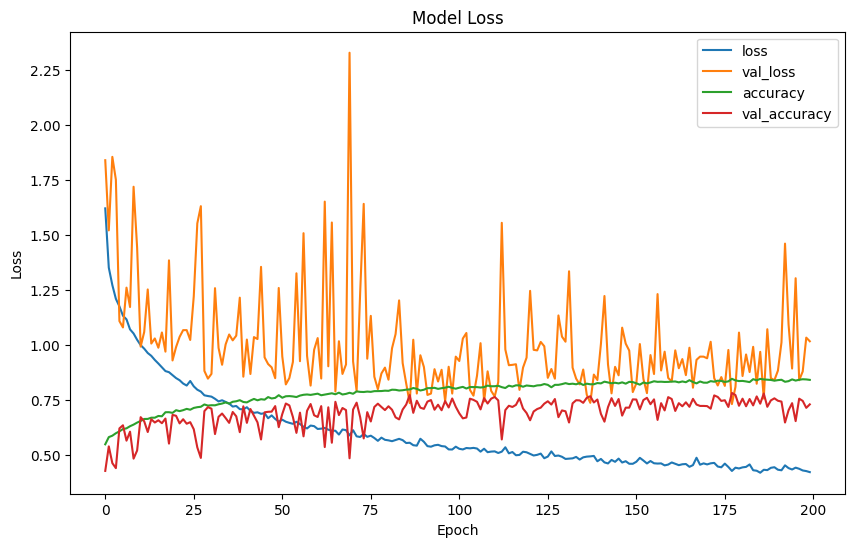

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

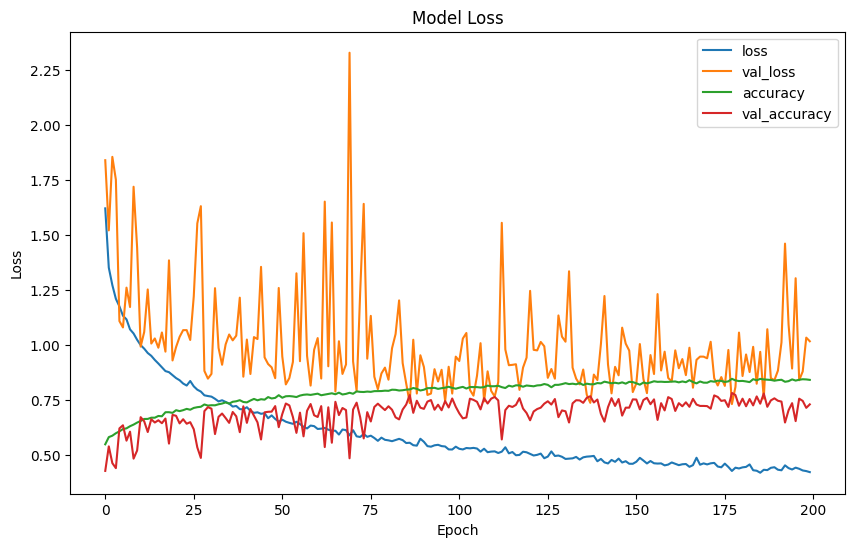

In [14]:
plt.figure(figsize=(10,6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [15]:
model = keras.models.load_model('/content/drive/MyDrive/Mushroom Project/mushroom_model')

In [16]:
y_test_categorical = to_categorical(y_test)

In [17]:
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9436718821525574
Test accuracy: 0.7448728680610657


In [18]:
predictions = model.predict(X_test, verbose=0)
preds = [np.argmax(p) for p in predictions]

In [19]:
accuracy_score(preds, y_test)

0.7448728465955702

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       701
           1       0.88      0.58      0.70        12
           2       0.64      0.71      0.67       124
           3       0.71      0.27      0.39        55
           4       0.86      0.92      0.89        13
           5       0.61      0.77      0.68        26
           6       0.62      0.80      0.70        81
           7       0.76      0.93      0.84        14
           8       0.49      0.77      0.60        48
           9       0.88      0.54      0.67        13
          10       0.70      0.36      0.48       122
          11       0.83      0.50      0.62        10

    accuracy                           0.74      1219
   macro avg       0.73      0.67      0.67      1219
weighted avg       0.75      0.74      0.73      1219

